# Exploratory Data Analysis on Housing Price in King County, USA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Import Dataset 

The dataset is obtained from: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [2]:
house = pd.read_csv('kc_house_data.csv', index_col=0)
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house.shape

(21613, 20)

There are 21613 observations and 20 columns in this dataset. The definition of each column is as follow:

id - Unique ID for each home sold \
date - Date of the home sale \
price - Price of each home sold \
bedrooms - Number of bedrooms \
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower \
sqft_living - Square footage of the apartments interior living space \
sqft_lot - Square footage of the land space \
floors - Number of floors \
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not \
view - An index from 0 to 4 of how good the view of the property was \
condition - An index from 1 to 5 on the condition of the apartment \
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction  and design, and 11-13 have a high quality level of construction and design. \
sqft_above - The square footage of the interior housing space that is above ground level \
sqft_basement - The square footage of the interior housing space that is below ground level \
yr_built - The year the house was initially built \
yr_renovated - The year of the house’s last renovation \
zipcode - What zipcode area the house is in \
lat - Lattitude \
long - Longitude \
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors \
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Reference: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion/207885

Observation: By column definition, 'sqft_above' + 'sqft_basement' = 'sqft_living'. There is multicollinearity.

## 1. Data Cleaning

In [4]:
house.duplicated().sum()

0

There is no duplicated row.

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

In [6]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


Observation:
1. There is no missing value nor duplicated observation in the dataset.
2. The format and datatype of 'date' column is incorrect.
3. The maximum value of 'bedrooms' is 33. It could possibly be a mansion. However, it is still a large number when compared to the mean.
4. The lower quartile, median, upper quartile of 'bathrooms' are decimals of .25 instead of .5.
5. The median of 'floor' is a decimal. It could possibly the case of penthouse.
6. The standard deviations of 'sqft_lot' and 'sqft_lot15' are large comparing to their means.

In [7]:
# transform 'date' column

house['sales_year'] = house['date'].str[0:4].astype('int')
house['sales_month'] = house['date'].str[4:6].astype('int')
house['sales_day'] = house['date'].str[6:8].astype('int')
#house.head()

In [8]:
bathrooms_int = house.bathrooms.apply(float.is_integer).sum()
print(str(bathrooms_int) + ' out of ' + str(len(house)) + ' houses have bathroom as a whole number.')

6710 out of 21613 houses have bathroom as a whole number.


Since the one-third of the data have decimal number of bathrooms, we decide not the remove these counter-intuitive observation. We will do a round off approach.

In [9]:
house['bathrooms'] = house['bathrooms'].round().astype('int')
#house.head()

In [10]:
# off-plan property

house[house['yr_built'] > house['sales_year']]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month,sales_day
id,,,,,,,,,,,,,,,,,,,,,
1832100030,20140625T000000,597326.0,4,4,3570,8250,2.0,0,0,3,...,2015,0,98040,47.5784,-122.226,2230,10000,2014,6,25
3076500830,20141029T000000,385195.0,1,1,710,6000,1.5,0,0,3,...,2015,0,98144,47.5756,-122.316,1440,4800,2014,10,29
9520900210,20141231T000000,614285.0,5,3,2730,6401,2.0,0,0,3,...,2015,0,98072,47.7685,-122.160,2520,6126,2014,12,31
1250200495,20140624T000000,455000.0,2,2,1200,1259,2.0,0,0,3,...,2015,0,98144,47.6001,-122.298,1320,1852,2014,6,24
2770601530,20140826T000000,500000.0,2,2,1570,1269,2.0,0,0,3,...,2015,0,98199,47.6514,-122.385,1570,6000,2014,8,26
9126100346,20140617T000000,350000.0,3,2,1380,3600,3.0,0,0,3,...,2015,0,98122,47.6074,-122.305,1480,3600,2014,6,17
9126100765,20140801T000000,455000.0,3,2,1320,1014,3.0,0,0,3,...,2015,0,98122,47.6047,-122.305,1380,1495,2014,8,1
9310300160,20140828T000000,357000.0,5,2,2990,9240,2.0,0,0,3,...,2015,0,98133,47.7384,-122.348,1970,18110,2014,8,28
1257201420,20140709T000000,595000.0,4,3,3730,4560,2.0,0,0,3,...,2015,0,98103,47.6725,-122.330,1800,4560,2014,7,9


There are 12 rows with 'yr_build' greater than 'sales_year'. That means the properties was sold before they were built. It seems counter-intuitive but it is actually possible. They are probably off-plan properties at the time of transaction. So, we will not remove these rows.

In [11]:
# remove unwanted columns

house = house.drop(columns=['date', 'sales_day'])
#house.head()

In [12]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  int32  
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64

In [13]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.058715,0.755524,0.0000,2.000,2.0000,2.000,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [14]:
df = house
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
6414100192,538000.0,3,2,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
5631500400,180000.0,2,1,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
2487200875,604000.0,4,3,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
1954400510,510000.0,3,2,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


Now, the dataset is ready and we can start the EDA.

## 2. Exploratory Data Analysis

### 2.1 Multicollinearity

In [15]:
(df['sqft_above'] + df['sqft_basement'] == df['sqft_living']).sum()

21613

There is multicollinearity among 'sqft_above', 'sqft_basement' and 'sqft_living'. If one wants to perform linear regression, one has to deal with this issue first.

### 2.2 Univariate Analysis

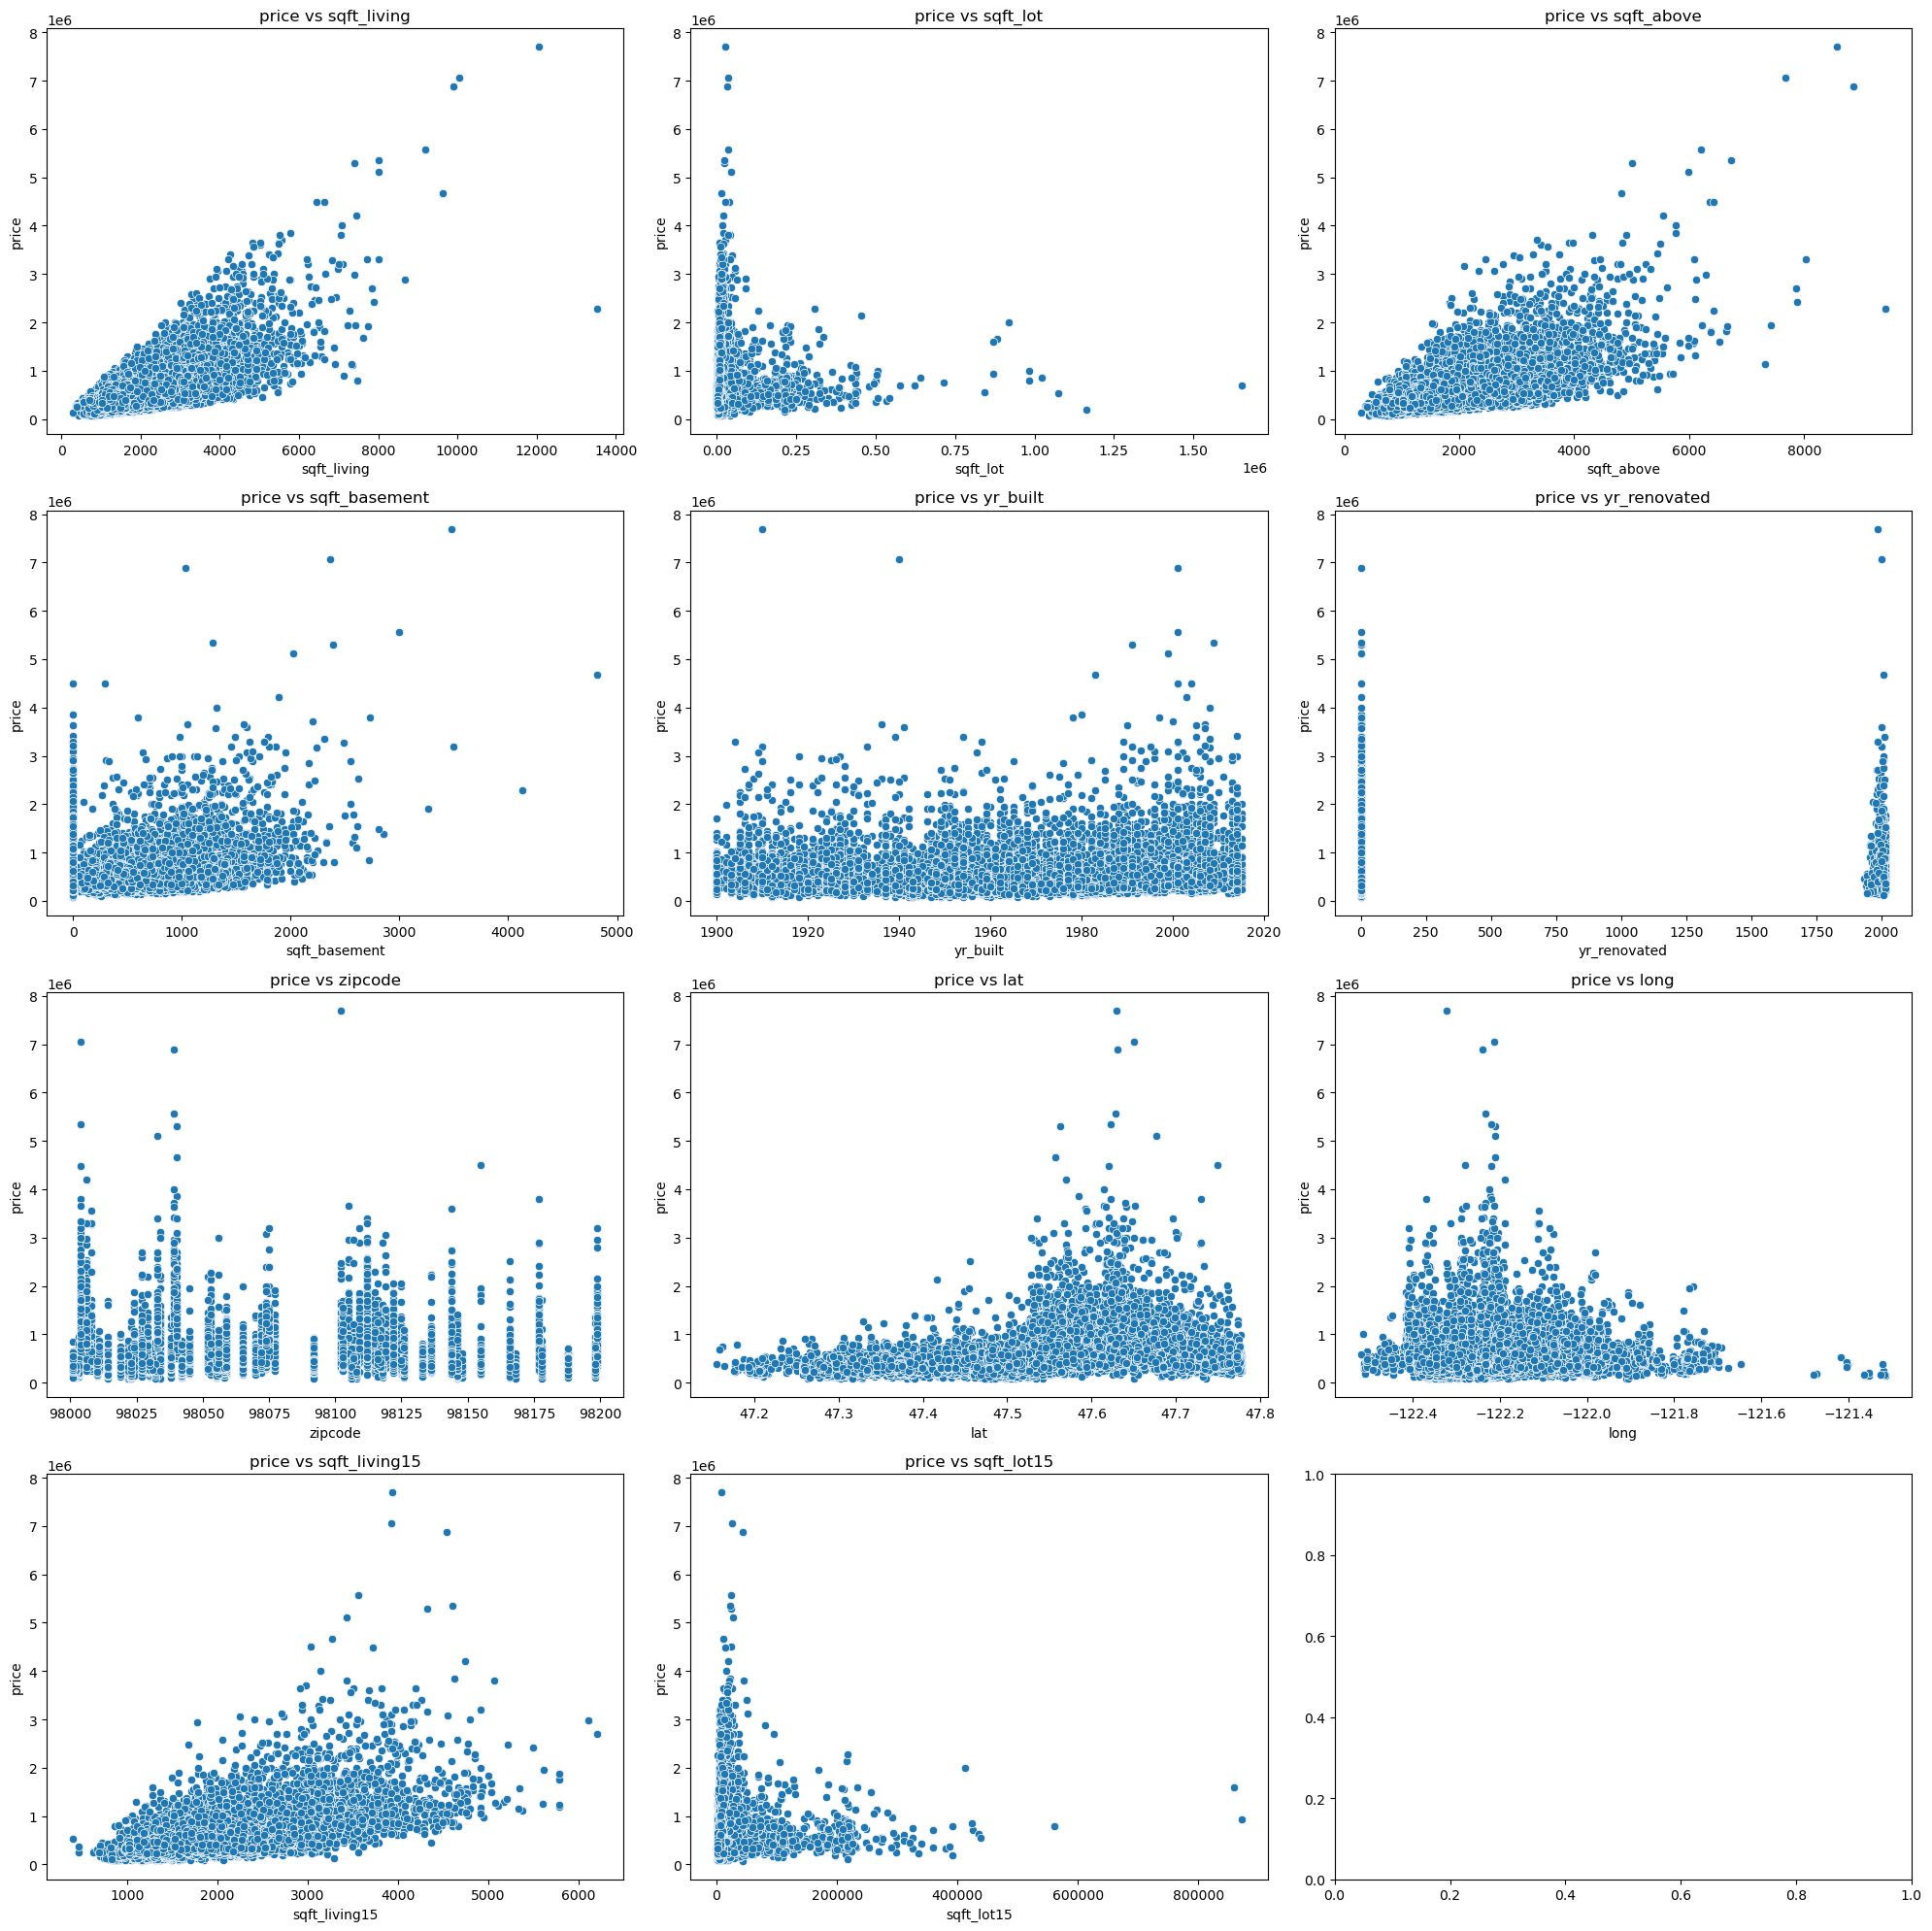

In [16]:
continuous_value_col = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', \
                      'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))

for i in range(len(continuous_value_col)):
    sns.scatterplot(x=df[continuous_value_col[i]], y=df['price'] ,data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title('price vs ' + continuous_value_col[i])

plt.tight_layout()
plt.show()

There is a positive relationship between price and sqft_living, price and sqft_above, price and sqft_living15. However, if we look back to the column definition, we can observe that sqft_living, sqft_above and sqft_living15 are similar to each other. 

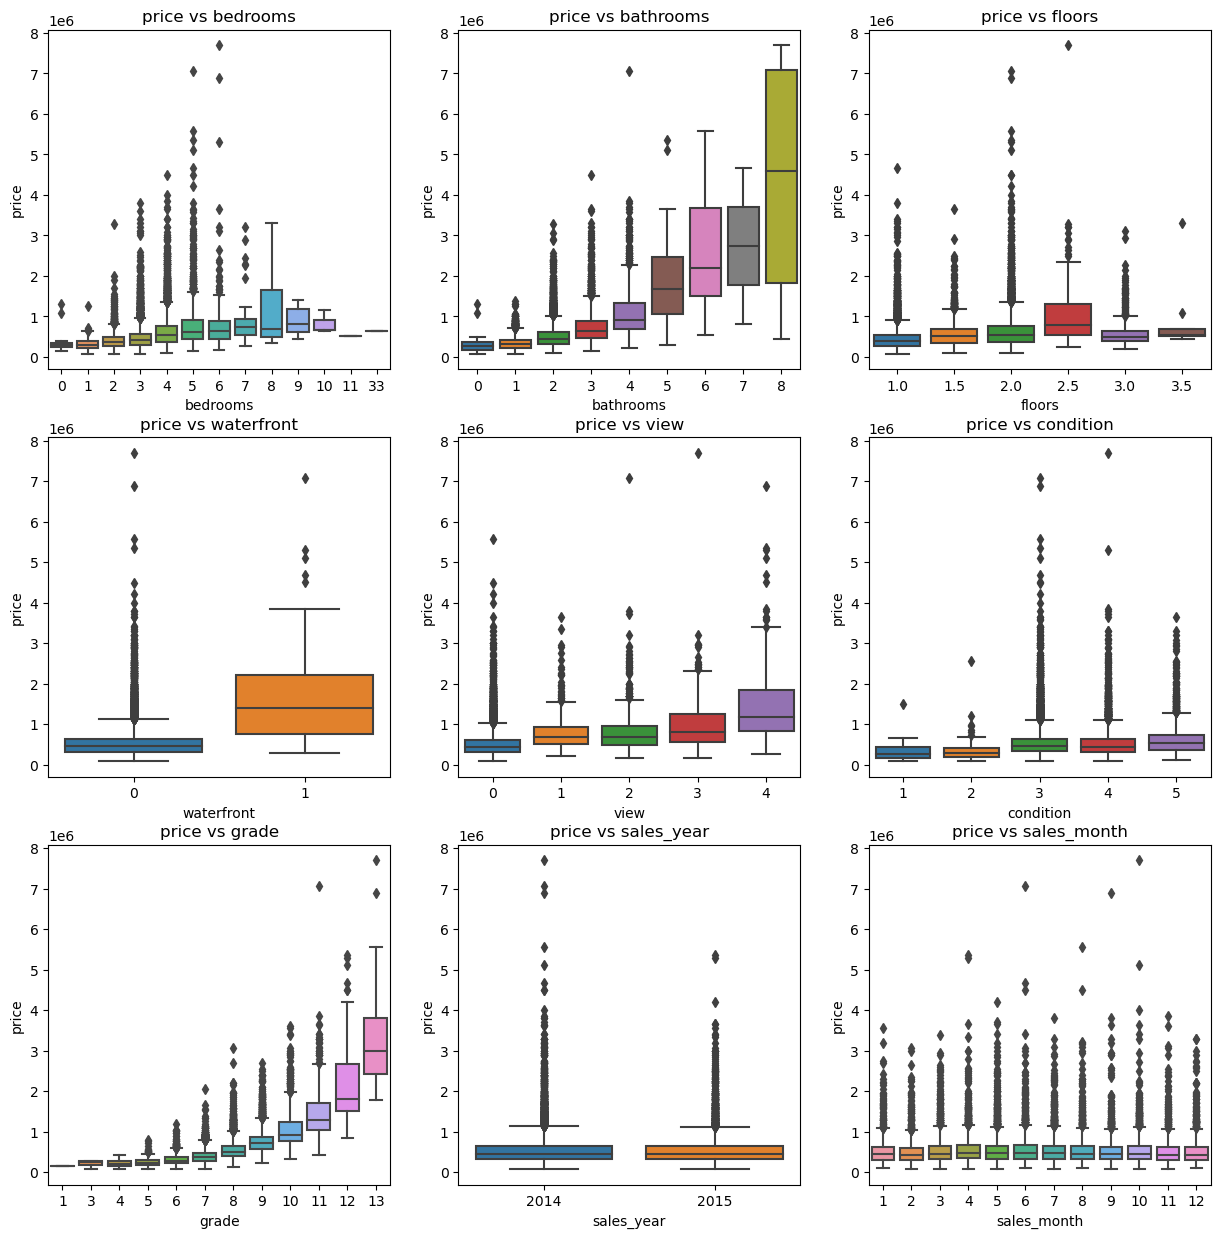

In [17]:
discrete_value_col = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sales_year', 'sales_month']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i in range(len(discrete_value_col)):
    sns.boxplot(x=df[discrete_value_col[i]], y=df['price'] ,data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title('price vs ' + discrete_value_col[i])

plt.show()

Observation:

1. There are two houses with 11 and 33 bedrooms respectively. Yet, their prices are comparable to the mean of 4/5-bedroom houses. This is very unlikely to happen.
2. There is a positive relationship between price and bathrooms, and price and grade. 
3. A lot of outliers are observed. We will look into these houses with price more than 2 million dollars. 
4. All outliers indicate overpriced housing sales. There is no house sold underpriced according to each feature (otherwise they will be dots below the boxplots).

### 2.3 Correlation

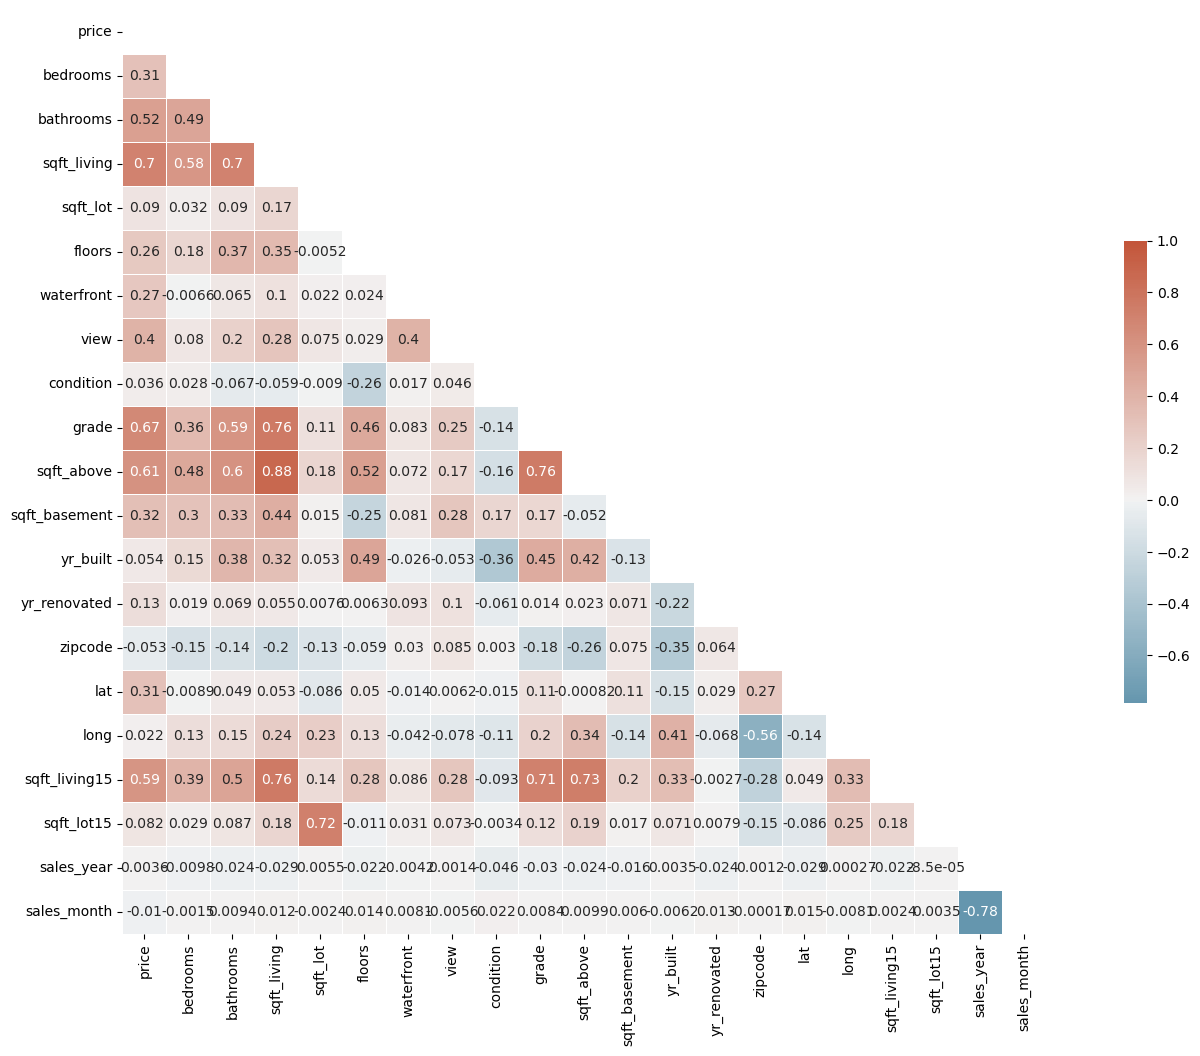

In [18]:
fig, ax = plt.subplots(figsize=(20,12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

There is a strong correlation between sqft_above and sqft_living. This is an expected result as there are overlapping in their calculation. 

### 2.4 Insights from above observation

#### a) Off-plan properties

In [19]:
df_off_plan = df[df['yr_built'] > df['sales_year']]
#df_off_plan

In [20]:
# reference: https://wellsr.com/python/plotting-geographical-heatmaps-with-python-folium-module/

import folium
from folium.plugins import HeatMap

offplan_map = list(map(list, zip(df_off_plan["lat"], df_off_plan["long"], df_off_plan["price"])))
offplanmap_obj = folium.Map(location = [df_off_plan['lat'].mean(), df_off_plan['long'].mean()], zoom_start = 11)
HeatMap(offplan_map).add_to(offplanmap_obj)
offplanmap_obj

Are these houses really off-plan property? We cannot tell from the data. If we really want to validate, we need to look at other sources of information.

#### b) Houses with more than 10 bedrooms

In [21]:
df_bedrooms = pd.concat([df[df['bedrooms'] > 10].transpose(), df.mean()], axis=1)
df_bedrooms_sqft = df_bedrooms[df_bedrooms.index.str.contains('sqft')]
df_bedrooms_sqft = pd.concat([df_bedrooms[:2], df_bedrooms_sqft], axis=0)
df_bedrooms_sqft.columns = ['11-bedrooms', '33-bedrooms', 'mean']
df_bedrooms_sqft

,11-bedrooms,33-bedrooms,mean
price,520000.0,640000.0,540088.141767
bedrooms,11.0,33.0,3.370842
sqft_living,3000.0,1620.0,2079.899736
sqft_lot,4960.0,6000.0,15106.967566
sqft_above,2400.0,1040.0,1788.390691
sqft_basement,600.0,580.0,291.509045
sqft_living15,1420.0,1330.0,1986.552492
sqft_lot15,4960.0,4700.0,12768.455652


Comparing the area metrics of the 11-bedroom house and the 33-bedroom house with mean values, these two houses are not exceptionally large (sqft_living and sqft_lot). This tells us the land space per bedroom (sqft_lot/bedrooms) of them is very small. 

#### c) Houses sold at > 2 millions

In [22]:
df_2mil = df[df['price'] >= 2000000]
#df_2mil

In [23]:
map_2m = list(map(list, zip(df_2mil["lat"], df_2mil["long"], df_2mil["price"])))
map2m_obj = folium.Map(location = [df_2mil['lat'].mean(), df_2mil['long'].mean()], zoom_start = 11)
HeatMap(map_2m).add_to(map2m_obj)
map2m_obj

If we look at the map carefully, we can observe that most of these two-million worth houses are very close to lakeshore. That's why they are more expensive than average houses!

### 2.5 Other Insights

#### a) Relationship between price and age of house

In [24]:
df['age_of_house'] = df['sales_year'] - df['yr_built']
#df.head()

<AxesSubplot:xlabel='age_of_house', ylabel='price'>

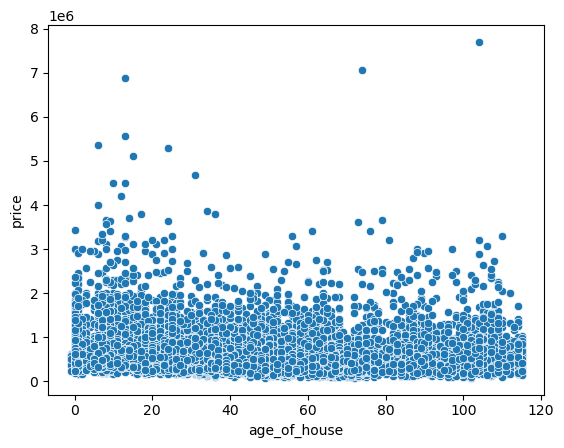

In [25]:
sns.scatterplot(x=df['age_of_house'], y=df['price'], data=df)

There is no relationship between price and age of house.

#### b) Relationship between price and renovation of house

In [26]:
df['renovated?'] = np.where(df['yr_renovated'] > 0, 1, 0)
#df.head()

In [27]:
df.groupby(df['renovated?'])['price'].mean()

renovated?
0    530360.818155
1    760379.029540
Name: price, dtype: float64

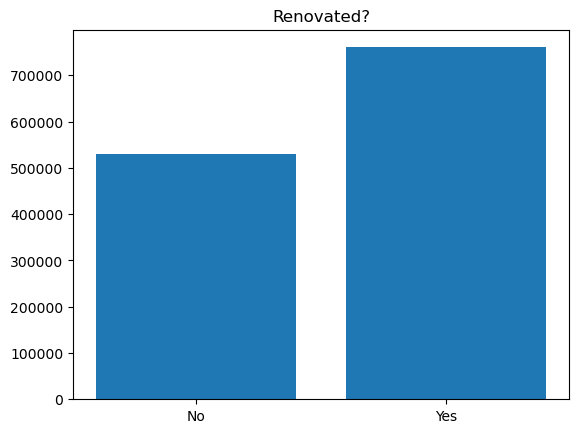

In [28]:
plt.bar(['0', '1'], height=df.groupby(df['renovated?'])['price'].mean(), tick_label=['No', 'Yes'])
plt.title('Renovated?')
plt.show()

Houses that had been renovated were generally sold at higher prices than those hadn't.